In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

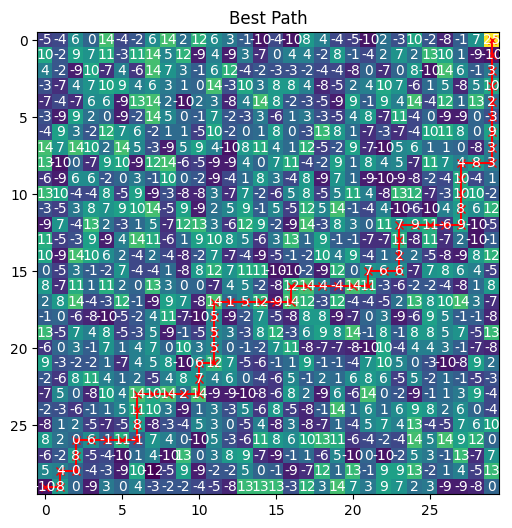

total cumulative reward of: 370


In [ ]:
data = pd.read_excel('Grid.xlsx', header=None)
data_size = len(data)

ACTIONS = ['up', 'right']
LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.9
Q_table = np.zeros((data_size, data_size, len(ACTIONS)))

def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        if state[0] > 0 and state[1] < data_size - 1:
            return random.choice(ACTIONS)
        elif state[0] > 0:
            return 'up'
        elif state[1] < data_size - 1:
            return 'right'
    else:
        state_row, state_col = state
        return ACTIONS[np.argmax(Q_table[state_row, state_col])]

def get_next_state(state, action):
    row, col = state
    if action == 'up' and row > 0:
        return (row - 1, col)
    elif action == 'right' and col < data_size - 1:
        return (row, col + 1)
    return state

def update_Q_table(state, action, reward, next_state):
    state_row, state_col = state
    next_state_row, next_state_col = next_state
    action_index = ACTIONS.index(action)

    current_Q_value = Q_table[state_row, state_col, action_index]
    max_future_Q = np.max(Q_table[next_state_row, next_state_col])
    new_Q_value = (1 - LEARNING_RATE) * current_Q_value + LEARNING_RATE * (reward + DISCOUNT_FACTOR * max_future_Q)

    Q_table[state_row, state_col, action_index] = new_Q_value

epochs = 10000
epsilon = 1.0
min_epsilon = 0.01
epsilon_decay = 0.999

for epoch in range(epochs):
    state = (data_size - 1, 0)
    while state != (0, data_size - 1):
        action = choose_action(state, epsilon)
        next_state = get_next_state(state, action)
        if 0 <= next_state[0] < data_size and 0 <= next_state[1] < data_size:
            reward = data.iloc[next_state[0], next_state[1]]
            update_Q_table(state, action, reward, next_state)
            state = next_state
        else:
            break
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

policy = np.argmax(Q_table, axis=2)

path = [(data_size - 1, 0)]
reward = data.iloc[path[0][0], path[0][1]] if not data.empty else 0

while path[-1] != (0, data_size - 1):
    action_index = policy[path[-1][0], path[-1][1]]
    action = ACTIONS[action_index]
    next_state = get_next_state(path[-1], action)
    path.append(next_state)
    reward += data.iloc[next_state[0], next_state[1]] if next_state[0] < data_size and next_state[1] < data_size else 0


plt.figure(figsize=(6, 6))
plt.imshow(data, cmap='viridis')


y, x = zip(*path)
plt.plot(x, y, color='red', marker='x')  
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        plt.text(j, i, str(data.iat[i, j]), ha='center', va='center', color='white')

plt.title('Best Path')
plt.show()

print("total cumulative reward of:", reward)
